In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def classify(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    classifier = SVC()
    pd.options.mode.copy_on_write = True

    classifier.fit(X_train, y_train)
    predicts = classifier.predict(X_val)
    
    print(classification_report(y_val, predicts))

In [13]:
# import kaggele dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# create data frame
df = pd.DataFrame(data)

# check for any null values
pd.isna(any(df))

# there are no null values in whole dataframe, so we can continue

False

In [14]:
# hceck for any duplicated rows
any(df.duplicated())


True

In [16]:
# removing duplicated rows
df = df.drop_duplicates()

# check for any duplicated rows
any(df.duplicated())

False

In [30]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on categorical columns
for i in ['Gender', 'CALC', 'CAEC', 'SCC', 'FAVC', 'SMOKE', 'family_history_with_overweight', 'MTRANS', 'NObeyesdad']:
    df[i] = lab.fit_transform(df[i])

df.head()
target = df['NObeyesdad']
features = df.drop('NObeyesdad', axis=1)

# 1. classify using all features
# test before applaying more sophisticated methods
classify(df, target)
# accuracy is 0.63

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        56
           1       0.65      0.54      0.59        72
           2       0.73      0.51      0.60        63
           3       0.50      0.78      0.61        46
           4       0.73      0.54      0.62        74
           5       0.54      0.67      0.60        54
           6       0.57      0.68      0.62        57

    accuracy                           0.63       422
   macro avg       0.64      0.64      0.63       422
weighted avg       0.65      0.63      0.63       422



In [32]:
#initialize normalizer
scaler = MinMaxScaler()

#calculate all the necessary data to perform the normalization
scaler.fit(features)

#apply the standarizer to the data
df_normalized = pd.DataFrame(scaler.transform(features),columns = features.columns)
df_normalized.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.219417,0.505921,0.474863,0.355120,0.756198,0.883941,0.709522,0.561876,0.045476,0.020843,0.504006,0.817622,0.336766,0.328933,0.619769,0.591307
std,0.135021,0.500083,0.176047,0.195457,0.171833,0.320371,0.266963,0.259346,0.208395,0.142893,0.306477,0.386247,0.283531,0.304464,0.156181,0.315356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126536,0.000000,0.339623,0.197562,0.666667,1.000000,0.500000,0.552913,0.000000,0.000000,0.292406,1.000000,0.041502,0.000000,0.666667,0.750000
50%,0.186764,1.000000,0.472640,0.328358,0.666667,1.000000,0.692751,0.666667,0.000000,0.000000,0.500000,1.000000,0.333333,0.312675,0.666667,0.750000
75%,0.255319,1.000000,0.600875,0.510677,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.738710,1.000000,0.555559,0.500000,0.666667,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# 2. classify using all features after normalization
classify(df_normalized, target)
# accuracy is 0.76

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        56
           1       0.66      0.54      0.60        72
           2       0.75      0.84      0.79        63
           3       0.86      0.93      0.90        46
           4       0.99      0.99      0.99        74
           5       0.61      0.70      0.66        54
           6       0.64      0.53      0.58        57

    accuracy                           0.76       422
   macro avg       0.75      0.76      0.75       422
weighted avg       0.75      0.76      0.75       422



<Axes: >

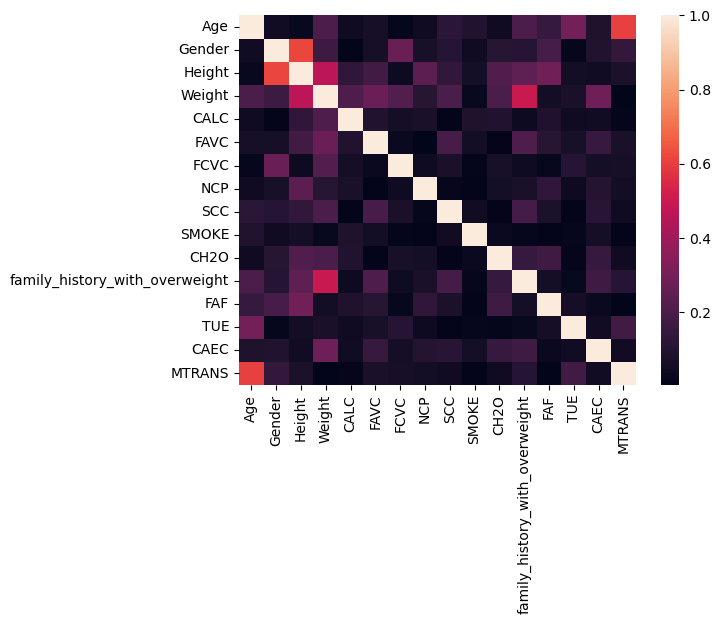

In [56]:
import seaborn as sns
# correlation matrix
sns.heatmap(abs(df_normalized.corr()))

In [36]:
#initialize standard scaler
scaler = StandardScaler()

# perform sandarization
x_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(x_scaled,columns = features.columns)
df_scaled.describe().round(3)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.625,-1.012,-2.698,-1.817,-4.402,-2.760,-2.658,-2.167,-0.218,-0.146,-1.645,-2.117,-1.188,-1.081,-3.969,-1.875
25%,-0.688,-1.012,-0.768,-0.806,-0.521,0.362,-0.785,-0.035,-0.218,-0.146,-0.691,0.472,-1.042,-1.081,0.300,0.503
50%,-0.242,0.988,-0.013,-0.137,-0.521,0.362,-0.063,0.404,-0.218,-0.146,-0.013,0.472,-0.012,-0.053,0.300,0.503
75%,0.266,0.988,0.716,0.796,1.419,0.362,1.088,0.404,-0.218,-0.146,0.766,0.472,0.772,0.562,0.300,0.503
max,5.783,0.988,2.984,3.300,1.419,0.362,1.088,1.690,4.581,6.854,1.619,0.472,2.340,2.205,2.435,1.296


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
x_pca = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)


[0.16278132 0.11654264 0.09558839 0.08480334 0.07033629 0.06665355
 0.06135247 0.05444052 0.05120547 0.04925825 0.04743343 0.04287739
 0.03756736 0.02504009]


0.9658805097401663

In [38]:
after_extration_df = pd.DataFrame(x_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
# 3. classify using all features after PCA
classify(after_extration_df, target)
# accuracy is 0.80

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        56
           1       0.67      0.68      0.68        72
           2       0.83      0.79      0.81        63
           3       0.86      0.96      0.91        46
           4       1.00      0.99      0.99        74
           5       0.73      0.74      0.73        54
           6       0.71      0.61      0.66        57

    accuracy                           0.80       422
   macro avg       0.80      0.80      0.80       422
weighted avg       0.80      0.80      0.80       422



              precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       0.98      0.67      0.79        72
           2       0.98      0.98      0.98        63
           3       0.89      0.91      0.90        46
           4       0.95      0.95      0.95        74
           5       0.71      0.94      0.81        54
           6       0.96      0.91      0.94        57

    accuracy                           0.90       422
   macro avg       0.91      0.91      0.90       422
weighted avg       0.92      0.90      0.90       422



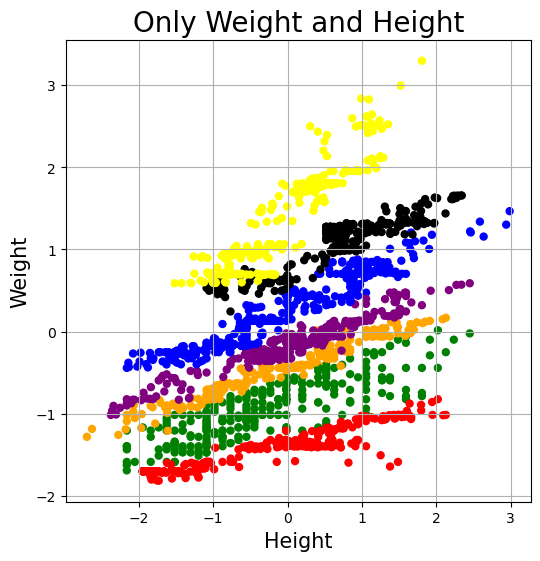

In [43]:
from copy import deepcopy

# cut the data frame to only Weight and Height
df_cut = deepcopy(df_scaled)
for i in df_scaled.columns:
    if i != 'Weight' and i != 'Height':
        df_cut.pop(i)

# plot the data
colrs = np.array(['red', 'green', 'blue', 'black', 'yellow', 'orange', 'purple'])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Only Weight and Height', fontsize=20)
ax.set_xlabel('Height', fontsize=15)
ax.set_ylabel('Weight', fontsize=15)
ax.grid()
ax.scatter(df_cut.Height, df_cut.Weight, c=colrs[df['NObeyesdad']], s=25)

# 4. classify using only Weight and Height
classify(df_cut, target)
# accuracy is 0.90

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        56
           1       0.93      0.79      0.86        72
           2       1.00      0.98      0.99        63
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        74
           5       0.78      0.85      0.81        54
           6       0.89      0.88      0.88        57

    accuracy                           0.92       422
   macro avg       0.92      0.93      0.92       422
weighted avg       0.93      0.92      0.92       422



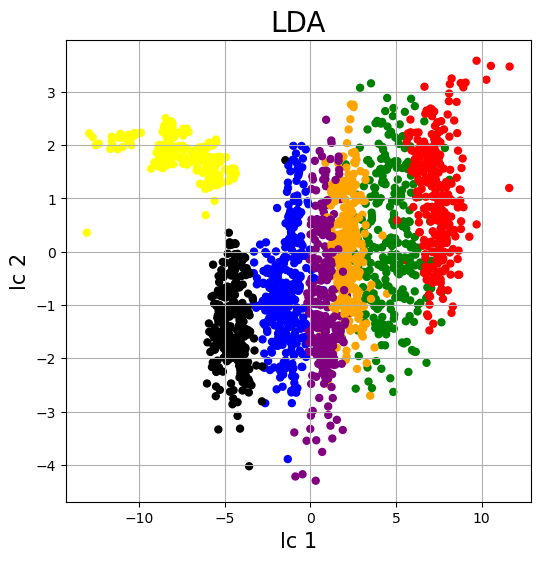

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lda analysis
lda = LDA(n_components = 2)
df_lda = pd.DataFrame(lda.fit_transform(df_scaled, target), columns = ['LC1','LC2'])

# plot the data
colors = np.array(['red', 'green', 'blue', 'black', 'yellow', 'orange', 'purple'])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('LDA', fontsize=20)
ax.set_xlabel('lc 1', fontsize=15)
ax.set_ylabel('lc 2', fontsize=15)
ax.grid()
ax.scatter(df_lda.LC1, df_lda.LC2, c=colors[y], s=25)

# 5. classify after LDA
classify(df_lda, target)
# accuracy is 0.92

In [51]:
# final test of an accuracy on test data
X_train, X_test, y_train, y_test = train_test_split(df_lda, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
classifier = SVC()
pd.options.mode.copy_on_write = True

classifier.fit(X_train, y_train)
predicts = classifier.predict(X_test)
    
print(classification_report(y_test, predicts))
# acuracy is 0.91

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        61
           1       0.86      0.69      0.77        45
           2       0.97      0.92      0.95        79
           3       0.96      0.98      0.97        54
           4       1.00      1.00      1.00        63
           5       0.80      0.85      0.83        61
           6       0.83      0.88      0.85        60

    accuracy                           0.91       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.91      0.91      0.90       423



In [52]:
# more tests
X_train, X_test, y_train, y_test = train_test_split(df_lda, target, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=12)
classifier = SVC()
pd.options.mode.copy_on_write = True

classifier.fit(X_train, y_train)
predicts = classifier.predict(X_test)
    
print(classification_report(y_test, predicts))
# acuracy is 0.93

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        53
           1       0.98      0.81      0.88        62
           2       0.97      0.99      0.98        70
           3       1.00      0.98      0.99        58
           4       1.00      1.00      1.00        63
           5       0.83      0.88      0.85        59
           6       0.88      0.86      0.87        58

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



In [54]:
# more tests
X_train, X_test, y_train, y_test = train_test_split(df_lda, target, test_size=0.2, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=35)
classifier = SVC()
pd.options.mode.copy_on_write = True

classifier.fit(X_train, y_train)
predicts = classifier.predict(X_test)
    
print(classification_report(y_test, predicts))
# acuracy is 0.92

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        56
           1       0.94      0.79      0.86        62
           2       0.98      0.97      0.97        58
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        58
           5       0.82      0.89      0.85        63
           6       0.88      0.85      0.86        60

    accuracy                           0.92       423
   macro avg       0.93      0.93      0.92       423
weighted avg       0.93      0.92      0.92       423

